# FINAL MODEL FUNCTION

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

In [26]:
# Reading Files
train = pd.read_csv('Hotel Reservations.csv')
train, test = train_test_split(train, test_size=0.25, random_state=25, shuffle=True)

In [27]:
train['booking_status'] = train['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
test['booking_status'] = test['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [28]:
# Model 1) Baseline Model
logit_model = sm.logit(formula = 'booking_status ~ no_of_adults + no_of_children  + no_of_weekend_nights + no_of_week_nights + type_of_meal_plan + required_car_parking_space + room_type_reserved +lead_time  + market_segment_type +repeated_guest + no_of_previous_cancellations + avg_price_per_room  + no_of_special_requests', data = train).fit()

#Predict the values using the Logit model
pred_values_1 = logit_model.predict(test)

         Current function value: 0.422758
         Iterations: 35


/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Model 2) 




In [ ]:
# Model 3) 



In [ ]:
# Model 4) 




In [ ]:
# Model 5) 




In [29]:
df = pd.DataFrame()
df['Model_1'] = pred_values_1
df['Model_2'] = pred_values_1
df['Model_3'] = pred_values_1
df['Model_4'] = pred_values_1
df['Model_5'] = pred_values_1

In [31]:
def applying_cutoff(df): 
    for col in df.columns:
        for index, value in df[col].iteritems():
            if value < 0.5:
                df.at[index, col] = 0
            else:
                df.at[index, col] = 1  
            
    return df

In [33]:
df = applying_cutoff(df)
df

Model_1  Model_2  Model_3  Model_4  Model_5
28112      1.0      1.0      1.0      1.0      1.0
6482       0.0      0.0      0.0      0.0      0.0
12183      0.0      0.0      0.0      0.0      0.0
34739      0.0      0.0      0.0      0.0      0.0
2375       1.0      1.0      1.0      1.0      1.0
...        ...      ...      ...      ...      ...
28804      0.0      0.0      0.0      0.0      0.0
9727       0.0      0.0      0.0      0.0      0.0
36076      1.0      1.0      1.0      1.0      1.0
25340      0.0      0.0      0.0      0.0      0.0
34948      0.0      0.0      0.0      0.0      0.0

[9069 rows x 5 columns]

In [34]:
# averaging the model results function
def combining_results(df): 
    df['sum'] = df.sum(axis=1)

    for index, row in df.iterrows():
        if row['sum'] >= 3:
            df.at[index, 'sum'] = 1
        else:
            df.at[index, 'sum'] = 0
        
    pred_values = df['sum']
    
    return pred_values

In [35]:
final_values = combining_results(df)
final_values

28112    1.0
6482     0.0
12183    0.0
34739    0.0
2375     1.0
        ... 
28804    0.0
9727     0.0
36076    1.0
25340    0.0
34948    0.0
Name: sum, Length: 9069, dtype: float64

In [36]:
# Modified confusion matrix function

from sklearn.metrics import roc_curve, auc

def confusion_matrix_data_modified(pred_values,actual_values,cutoff=0.5):
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 79.5%
Precision = 74.0%
TPR or Recall = 59.2%
FNR = 40.8%
FPR = 10.4%
ROC-AUC = 74.4%


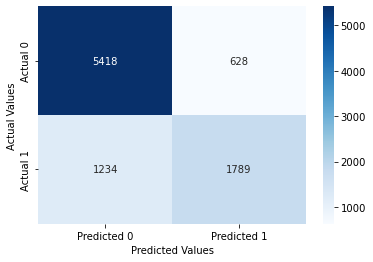

In [37]:
# Calling the function
confusion_matrix_data_modified(final_values,test.booking_status,0.45)